MLP Model 1 (32 nodes, 2 layers)


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: Precision,Recall,accuracy,loss
  current = self.get_monitor_value(logs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.8948 - Recall: 0.9046 - accuracy: 0.9753 - loss: 0.7707
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Precision: 1.0000 - Recall: 0.8401 - accuracy: 0.9760 - loss: 1.5468
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Precision: 0.9959 - Recall: 0.8992 - accuracy: 0.9873 - loss: 0.5735
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.9680 - Recall: 0.9370 - accuracy: 0.9873 - loss: 0.2927
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.8278 - Recall: 0.8912 - accuracy: 0.9555 - loss: 2.4716
MLP Model 2 (32 nodes, 4 layers)
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8789 - loss: 0.3645
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7515 - Recall: 0.6537 - accuracy: 0.9156 - loss: 0.2966
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8836 - loss: 0.3646
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7569 - Recall: 0.

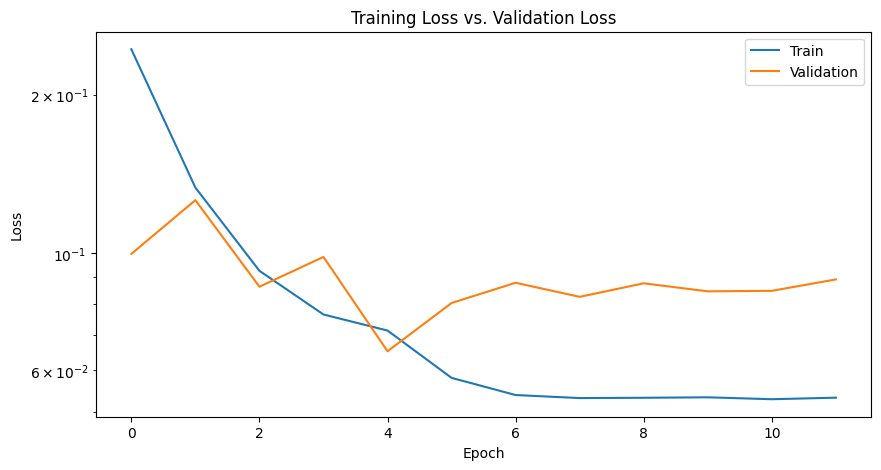

In [5]:
# importing DecisionTree, RandomForest, and SVM classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# MLP
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

train = pd.read_csv('./train_midterm.csv')
test = pd.read_csv('./test_midterm.csv')

# y = 1364 column; x = 0 -> 1363 columns; y = 0 -> 4458 rows
x_train = train.drop(['label'], axis=1)
y_train = train['label']

x_test = test.drop(['label'], axis=1)
y_test = test['label']

# turn into arrays for matrix multiplication
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# shuffle the entire training set first
indices = np.random.permutation(len(x_train))
x_shuffled = x_train[indices]
y_shuffled = y_train[indices]

w = 0 # w_old
rate = 0.1
epochs = 50

training_loss_graph = []
validation_loss_graph = []

mean_train_loss = []
mean_val_loss = []

temp_train_loss = []
temp_val_loss = []
each_model_train_losses = []
each_model_val_losses = [] # saves the final val_loss of each model type
current_fold = 1

# tune these hyperparameters
width = 0
depth = 0

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

class MLP:
  def __init__(self, model_module: dict) -> None:
    """ Initialization

    Args:
      model_module (dict): A dictionary containing the model hyperparameters
    Returns:
      (None)
    """
    self.module = model_module

    # Build Neural Network
    self.model = self.build_mlp()

    # Compile the model
    self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

  def build_mlp(self) -> Sequential:
    """ Build the MLP model

    Args:
      (None)
    Returns:
      (tf.keras.models.Sequential): A fully connected neural network - MLP model
    """

    def build_block(model: Sequential, module: dict) -> None:
      """ Build a block/hidden-layer of the MLP model

      Args:
        model (tf.keras.models.Sequential): An under-construction neural network
        module (dict): A dictionary containing the model hyperparameters
      Returns:
        (tf.keras.models.Sequential): A neural network with Input and Hidden layers
      """

      model.add(
          Dense(
              units=self.module['hidden_layer']['num_nodes'],
              activation=self.module['hidden_layer']['activation']
          )
      )

    model = Sequential(layers=None, trainable=True, name='Multi-layer_Perceptron')

    # Input layer
    input_shape = x_train.shape[1] if module['input_layer']['shape'] == "None" else module['input_layer']['shape']
    model.add(Input(shape=(input_shape,)))

    # Hidden layers
    for _ in range(self.module['hidden_layer']['num_layers']):
      build_block(model, self.module)

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    return model


with open('mlp_module1.json', 'r') as a:
  module = json.load(a) # MLP Model 1 (32 nodes, 2 layers)
mlp1 = MLP(module)

with open('mlp_module2.json', 'r') as b:
  module = json.load(b) # MLP Model 2 (32 nodes, 4 layers)
mlp2 = MLP(module)

with open('mlp_module3.json', 'r') as c:
  module = json.load(c) # MLP Model 3 (64 nodes, 2 layers)
mlp3 = MLP(module)

with open('mlp_module4.json', 'r') as d:
  module = json.load(d) # MLP Model 4 (64 nodes, 4 layers)
mlp4 = MLP(module)


# MLP Model 1 (32 nodes, 2 layers)
print("MLP Model 1 (32 nodes, 2 layers)")

for train_indices, val_indices in kfold.split(x_train):
  model = mlp1.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=50,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  # Evaluate the model, print mean_train_loss and mean_val_loss for each fold
  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])

  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  temp_train_loss.append(np.mean(history.history['loss']))

  mean_val_loss.append(val_loss[0]) # save to print 20 fold val losses
  temp_val_loss.append(val_loss[0])

# mean of all the losses for final model type loss
each_model_train_losses.append(np.mean(temp_train_loss))
each_model_val_losses.append(np.mean(temp_val_loss))
temp_train_loss.clear()
temp_val_loss.clear()


# MLP Model 2 (32 nodes, 4 layers)
print("MLP Model 2 (32 nodes, 4 layers)")

for train_indices, val_indices in kfold.split(x_train):
  model = mlp2.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=50,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])
  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  temp_train_loss.append(np.mean(history.history['loss']))
  mean_val_loss.append(val_loss[0]) # save to print 20 fold val losses
  temp_val_loss.append(val_loss[0])
each_model_train_losses.append(np.mean(temp_train_loss))
each_model_val_losses.append(np.mean(temp_val_loss))
temp_train_loss.clear()
temp_val_loss.clear()


# MLP Model 3 (64 nodes, 2 layers)
print("MLP Model 3 (64 nodes, 2 layers)")

for train_indices, val_indices in kfold.split(x_train):
  model = mlp3.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=50,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])
  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  temp_train_loss.append(np.mean(history.history['loss']))
  mean_val_loss.append(val_loss[0]) # save to print 20 fold val losses
  temp_val_loss.append(val_loss[0])
each_model_train_losses.append(np.mean(temp_train_loss))
each_model_val_losses.append(np.mean(temp_val_loss))
temp_train_loss.clear()
temp_val_loss.clear()


# MLP Model 4 (64 nodes, 4 layers)
print("MLP Model 4 (64 nodes, 4 layers)")

for train_indices, val_indices in kfold.split(x_train):
  model = mlp4.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=50,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])
  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  temp_train_loss.append(np.mean(history.history['loss']))
  mean_val_loss.append(val_loss[0]) # save to print 20 fold val losses
  temp_val_loss.append(val_loss[0])
each_model_train_losses.append(np.mean(temp_train_loss))
each_model_val_losses.append(np.mean(temp_val_loss))
temp_train_loss.clear()
temp_val_loss.clear()


# print fold train val losses, choose best model, train, validate, test, plot
for i in range(0, 4):
  if (i == 0): # model 1
    width, depth = 32, 2
  elif (i == 1): # model 2
    width, depth = 32, 4
  elif (i == 2): # model 3
    width, depth = 64, 2
  elif (i == 3): # model 4
    width, depth = 64, 4
  #print(f"Hyperparameters: ({width} width, {depth} depth) -- Fold {current_fold} mean_train_loss: {mean_train_loss[i]:.4f} -- Fold {current_fold} mean_val_loss: {mean_val_loss[i]:.4f}")
  print(f"MLP Hyperparameters: ({width} width, {depth} depth) -- Model {i+1} mean_train_loss: {each_model_train_losses[i]:.4f} -- Model {i+1} mean_val_loss: {each_model_val_losses[i]:.4f}")
  current_fold += 1
  if (current_fold > 5):
    current_fold = 1

if (each_model_val_losses.index(min(each_model_val_losses)) == 0):
  width = 32
  depth = 2
  model = mlp1.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
elif (each_model_val_losses.index(min(each_model_val_losses)) == 1):
  width = 32
  depth = 4
  model = mlp2.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
elif (each_model_val_losses.index(min(each_model_val_losses)) == 2):
  width = 64
  depth = 2
  model = mlp3.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
elif (each_model_val_losses.index(min(each_model_val_losses)) == 3):
  width = 64
  depth = 4
  model = mlp4.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
print(f"Best MLP Hyperparameters: ({width} width, {depth} depth)")

history = model.fit(
  x=x_shuffled,
  y=y_shuffled,
  epochs=50,
  #batch_size=8,
  validation_split=0.1, # 90 10 split
  verbose=0,
  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
)

results = model.evaluate(x_test, y_test)
test_prediction = model.predict(x_test)
predicted_class = (test_prediction >= 0.5).astype(int)
f1 = f1_score(y_test, predicted_class)

print(f"Accuracy: {results[1]:.4f}")
print(f"Precision: {results[2]:.4f}")
print(f"Recall: {results[3]:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Final Train Loss: {history.history['loss'][-1]}")
print(f"Final Test Loss: {results[0]:.4f}\n")



# Support Vector Machine (SVM)
svc = SVC(probability=True, random_state=42) # buliding hte model
param_grid={'C': [1, 10]}

# OR: grid_search_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid={'C': [1,10]}, cv=5, verbose=1)
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=1, return_train_score=True, scoring='neg_log_loss') # cv = 5-fold cross-validation
grid_search_svc.fit(x_train, y_train)

# best model hyperparameters after all of their cross-validations
results = pd.DataFrame(grid_search_svc.cv_results_)
for i in range(len(results)):
  parameters = results.loc[i, 'params']
  mean_train_loss = results.loc[i, 'mean_train_score'] * -1
  mean_val_loss = results.loc[i, 'mean_test_score'] * -1
  print(f"SVC Hyperparameters: {parameters} -- Model {i+1} mean_train_loss: {mean_train_loss:.4f} -- Model {i+1} mean_val_loss: {mean_val_loss:.4f}")

print(f"Best SVC Hyperparameters: {grid_search_svc.best_params_}")
best_svc = grid_search_svc.best_estimator_

# metrics
train_loss = log_loss(y_train, best_svc.predict_proba(x_train))
test_loss = log_loss(y_test, best_svc.predict_proba(x_test))

test_prediction = best_svc.predict(x_test)
predicted_class = (test_prediction >= 0.5).astype(int)

accuracy = accuracy_score(y_test, test_prediction)
precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)
f1 = f1_score(y_test, predicted_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Final Train Loss: {train_loss:.4f}")
print(f"Final Test Loss: {test_loss:.4f}\n")



# Random Forest
rfc = RandomForestClassifier(random_state=42) # buliding hte model
param_grid={'n_estimators': [100, 200], 'max_depth': [5, 10]}

# OR: grid_search_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid={'C': [1,10]}, cv=5, verbose=1)
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=1, return_train_score=True, scoring='neg_log_loss') # cv = 5-fold cross-validation
grid_search_rfc.fit(x_train, y_train)

# best model hyperparameters after all of their cross-validations
results = pd.DataFrame(grid_search_rfc.cv_results_)
for i in range(len(results)):
  parameters = results.loc[i, 'params']
  mean_train_loss = results.loc[i, 'mean_train_score'] * -1
  mean_val_loss = results.loc[i, 'mean_test_score'] * -1
  print(f"RFC Hyperparameters: {parameters} -- Model {i+1} mean_train_loss: {mean_train_loss:.4f} -- Model {i+1} mean_val_loss: {mean_val_loss:.4f}")

print(f"Best RandomForest Hyperparameters: {grid_search_rfc.best_params_}")
best_rfc = grid_search_rfc.best_estimator_

# metrics
train_loss = log_loss(y_train, best_rfc.predict_proba(x_train))
test_loss = log_loss(y_test, best_rfc.predict_proba(x_test))

test_prediction = best_rfc.predict(x_test)
predicted_class = (test_prediction >= 0.5).astype(int)

accuracy = accuracy_score(y_test, test_prediction)
precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)
f1 = f1_score(y_test, predicted_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Final Train Loss: {train_loss:.4f}")
print(f"Final Test Loss: {test_loss:.4f}\n")



# Decision Tree
tree = DecisionTreeClassifier(random_state=42) # buliding hte model
param_grid={'max_depth': [5, 10]}

# OR: grid_search_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid={'C': [1,10]}, cv=5, verbose=1)
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, verbose=1, return_train_score=True, scoring='neg_log_loss') # cv = 5-fold cross-validation
grid_search_tree.fit(x_train, y_train)

# best model hyperparameters after all of their cross-validations
results = pd.DataFrame(grid_search_tree.cv_results_)
for i in range(len(results)):
  parameters = results.loc[i, 'params']
  mean_train_loss = results.loc[i, 'mean_train_score'] * -1
  mean_val_loss = results.loc[i, 'mean_test_score'] * -1
  print(f"Tree Hyperparameters: {parameters} -- Model {i+1} mean_train_loss: {mean_train_loss:.4f} -- Model {i+1} mean_val_loss: {mean_val_loss:.4f}")

print(f"Best DecisionTree Hyperparameters: {grid_search_tree.best_params_}")
best_tree = grid_search_tree.best_estimator_

# metrics
train_loss = log_loss(y_train, best_tree.predict_proba(x_train))
test_loss = log_loss(y_test, best_tree.predict_proba(x_test))

test_prediction = best_tree.predict(x_test)
predicted_class = (test_prediction >= 0.5).astype(int)

accuracy = accuracy_score(y_test, test_prediction)
precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)
f1 = f1_score(y_test, predicted_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Final Train Loss: {train_loss:.4f}")
print(f"Final Test Loss: {test_loss:.4f}\n")



# MLP plotting best train and validation loss
plt.figure(figsize=(10, 5))
plt.yscale('log') # log y
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()